<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/IRC003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment Setup

In [ ]:
!pip install toad

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder


import numpy as np
import glob
import math
import seaborn as sns
import matplotlib.pyplot as plt
import toad
import pickle
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr


from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, \
    precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/loan_data_2007_2014.csv.7z.001

--2024-09-24 11:44:56--  https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/loan_data_2007_2014.csv.7z.001
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20000000 (19M) [application/octet-stream]
Saving to: ‘loan_data_2007_2014.csv.7z.001’

loan_data_2007_2014 100%[===================>]  19.07M  44.5MB/s    in 0.4s    

2024-09-24 11:44:57 (44.5 MB/s) - ‘loan_data_2007_2014.csv.7z.001’ saved [20000000/20000000]



In [ ]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/loan_data_2007_2014.csv.7z.002

--2024-09-24 11:44:57--  https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/loan_data_2007_2014.csv.7z.002
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17938344 (17M) [application/octet-stream]
Saving to: ‘loan_data_2007_2014.csv.7z.002’

loan_data_2007_2014 100%[===================>]  17.11M  40.0MB/s    in 0.4s    

2024-09-24 11:44:57 (40.0 MB/s) - ‘loan_data_2007_2014.csv.7z.002’ saved [17938344/17938344]



In [ ]:
!pwd

/content


In [ ]:
# prompt: unzip loan_data_2007_2014.7z
# !7z x loan_data_2007_2014.csv.7z.001 -tsplit
!7z x loan_data_2007_2014.csv.7z.001


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 20000000 bytes (20 MiB)

Extracting archive: loan_data_2007_2014.csv.7z.001
  0% 1 Open           --
Path = loan_data_2007_2014.csv.7z.001
Type = Split
Physical Size = 20000000
Volumes = 2
Total Physical Size = 37938344
----
Path = loan_data_2007_2014.csv.7z
Size = 37938344
--
Path = loan_data_2007_2014.csv.7z
Type = 7z
Physical Size = 37938344
Headers Size = 154
Method = LZMA2:26
Solid = -
Blocks = 1

  0%      5% - loan_data_2007_2014.csv                               10% - loan_data_2007_2014.csv                               15% - loan_data_2007_2014.csv

## Import Data

In [ ]:
pd.options.display.max_columns = None
df=pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

In [ ]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: delete column 'Unnamed: 0' from dataframe 'df'

if 'Unnamed: 0' in df.columns:
  df = df.drop('Unnamed: 0', axis=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
toad.detector.detect(df)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
id,int64,466285,0.00%,466285,13079729.906182,10893711.624551,54734.0,405827.04,1126000.6,10107897.0,20731209.0,31196526.8,36581422.24,38098114.0
member_id,int64,466285,0.00%,466285,14597660.622827,11682367.44145,70473.0,448636.52,1357865.8,11941075.0,23001541.0,33760612.6,39324094.28,40860827.0
loan_amnt,int64,466285,0.00%,1352,14317.277577,8286.509164,500.0,1750.0,5000.0,12000.0,20000.0,26000.0,35000.0,35000.0
funded_amnt,int64,466285,0.00%,1354,14291.801044,8274.3713,500.0,1725.0,5000.0,12000.0,20000.0,26000.0,35000.0,35000.0
funded_amnt_inv,float64,466285,0.00%,9854,14222.329888,8297.637788,0.0,1500.0,5000.0,12000.0,19950.0,26000.0,35000.0,35000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
all_util,float64,466285,100.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rev_hi_lim,float64,466285,15.07%,14612,30379.087771,37247.129571,0.0,3000.0,8200.0,22800.0,37900.0,58600.0,138000.0,9999999.0
inq_fi,float64,466285,100.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cu_tl,float64,466285,100.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Data Preprocessing

彻底的数据探索对于评估数据质量、完整性和不平衡性至关重要，同时也有助于识别对模型和评分卡开发至关重要的趋势。成功的数据清洗依赖于对业务背景的深入理解，以便准确修正异常和不一致性。

In [ ]:
def clean_data(df):


    ## cols to be dropped
    #id, member_id: not relevant in creating score card
    #funded_amnt, funded_amnt_inv: same as loan amount, to be removed to avoid multicollinearity
    #grade: to be dropped as sub-grade is a subset of grade
    #title: to be dropped as the purpose column will suffice
    #url: text attributes to be removed
    #policy_code, application_type: have only one unique value
    #last_pymnt_d: can't be used during application
    #total_pymnt_inv: same as total_pymnt
    #emp_title

    df.drop(df[['id','member_id','funded_amnt',
                'funded_amnt_inv','grade','url','application_type','title','policy_code','emp_title',
                'pymnt_plan','last_pymnt_d','last_pymnt_amnt','total_pymnt_inv','zip_code','addr_state']],
            axis=1, inplace=True)

    # Drop columns with 70% N/A of the data:
    df.dropna(axis='columns', thresh=0.7*len(df), inplace=True)

    df['emp_length'].replace({'10+ years': 10, '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
                              '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9}, inplace=True)


    # Calculate mode of the column
    mode_value = df['emp_length'].mode()[0]

    # Replace missing values with mode
    df['emp_length'] = df['emp_length'].fillna(mode_value)

    # Replace all numerical values where NA with -9999
    df[df.select_dtypes(include=['int64', 'float64']).columns] = df.select_dtypes(include=['int64', 'float64']).fillna(-9999)

    return df

df=clean_data(df)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,162.87,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,Jan-16,0.0,0.0,-9999.0,-9999.0,-9999.0
1,2500,60 months,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,Sep-13,0.0,0.0,-9999.0,-9999.0,-9999.0
2,2400,36 months,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,Jan-16,0.0,0.0,-9999.0,-9999.0,-9999.0
3,10000,36 months,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,10000.00,2209.33,16.97,0.00,0.00,Jan-15,0.0,0.0,-9999.0,-9999.0,-9999.0
4,3000,60 months,12.69,67.79,B5,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,Jan-16,0.0,0.0,-9999.0,-9999.0,-9999.0


In [ ]:
def feat_eng(df):
    # credit history tenure
    df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
    df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
    df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')



    df['credit_history_tenure_years'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 365.25
    df['credit_history_tenure_months'] = (df['issue_d'].dt.to_period('M') - df['earliest_cr_line'].dt.to_period('M'))
    df['credit_history_tenure_months'] = df['credit_history_tenure_months'].apply(lambda x: x.n if x is not pd.NaT else 0)


    df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month

    # months between issue
    df['credit_pull_months'] = (df['issue_d'].dt.to_period('M') - df['last_credit_pull_d'].dt.to_period('M'))
    df['credit_pull_months'] = df['credit_pull_months'].apply(lambda x: x.n if x is not pd.NaT else 0)


    df['loan_to_income_ratio'] = df['loan_amnt'] / df['annual_inc']


    df.drop(['earliest_cr_line','last_credit_pull_d','last_credit_pull_d'], axis=1, inplace=True)
    return df

df=feat_eng(df)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio
0,5000,36 months,10.65,162.87,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,26.913073,323,1.0,-49,0.208333
1,2500,60 months,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,0.0,0.0,-9999.0,-9999.0,-9999.0,12.668036,152,4.0,-21,0.083333
2,2400,36 months,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,10.080767,121,11.0,-49,0.195886
3,10000,36 months,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,10000.00,2209.33,16.97,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,15.830253,190,2.0,-37,0.203252
4,3000,60 months,12.69,67.79,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,15.915127,191,1.0,-49,0.037500


## Define Good and Bad Loans

定义好坏贷款是评分卡开发中的一个关键步骤，它作为模型评估和训练的目标变量。在现实情况中，贷款可能有多种状态，如当前、违约、已付、宽限期等。与领域专家合作，根据贷款的状态准确地将贷款分类为好或坏是至关重要的。

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


### Bad Loans Status
* Charged Off
* Late (31-120 days)
* Late (16-30 days)
* Default
* Does not meet the credit policy. Status:Charged Off

### Good Loans Status
* Fully Paid
* Does not meet the credit policy. Status:Fully Paid

In [ ]:
def good_bad(df):

    # assign 0 to bad loans and 1 to good loans

    #bad loans
    condition1=np.isin(df['loan_status'],['Charged Off','Late (31-120 days)','Late (16-30 days)','Default','Does not meet the credit policy. Status:Charged Off'])
    replace=['0']
    df['loan_status']=np.where(condition1,replace,df['loan_status'])

    #good loans
    condition2=np.isin(df['loan_status'],['Fully Paid','Does not meet the credit policy. Status:Fully Paid'])
    replace=['1']
    df['loan_status']=np.where(condition2,replace,df['loan_status'])

    #drop status In Grace Period and Current because we are not sure if they will repay the loans or not
    values_to_drop = ['In Grace Period', 'Current']
    df = df[~df['loan_status'].isin(values_to_drop)]

    return df


df=good_bad(df)

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
1,186727
0,52186


## Performance and Sample Windows

接下来的关键步骤是确定样本窗口。这个时间框架定义了您将收集数据样本以构建评分卡的时间段。它需要包括足够数量的好坏贷款。此外，它还应该在不过于陈旧和过于新近之间取得平衡。

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['loan_status'] = pd.to_numeric(df['loan_status'])

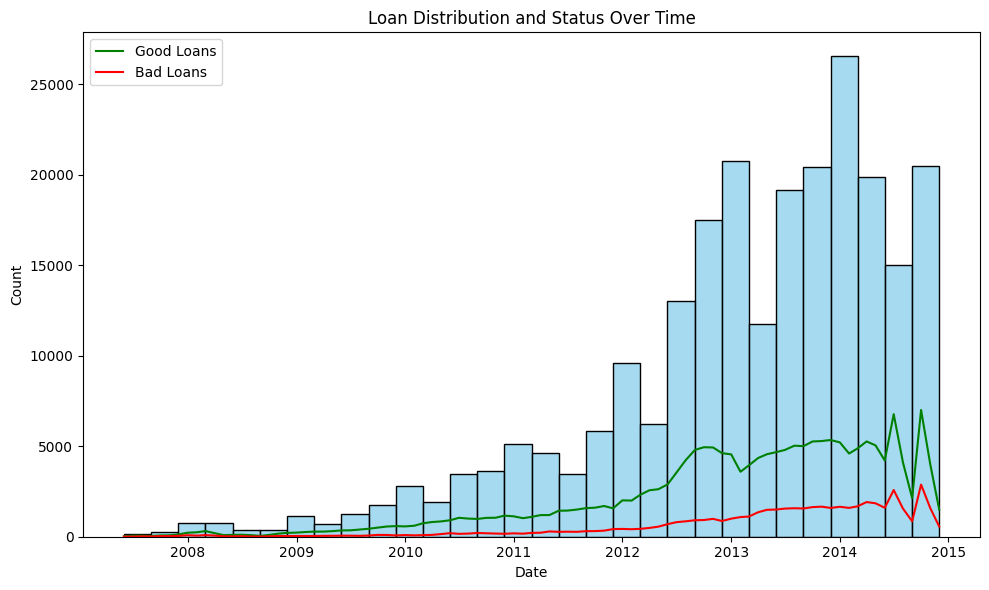

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Histogram with loan distribution over time
sns.histplot(data=df, x='issue_d', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Count', color='skyblue')
plt.title('Loan Distribution and Status Over Time')

# Line plot for good loans
good_loans = df[df['loan_status'] == 1].groupby('issue_d').size().reset_index(name='Count')
sns.lineplot(data=good_loans, x='issue_d', y='Count', color='green', label='Good Loans')

# Line plot for bad loans
bad_loans = df[df['loan_status'] == 0].groupby('issue_d').size().reset_index(name='Count')
sns.lineplot(data=bad_loans, x='issue_d', y='Count', color='red', label='Bad Loans')


#plt.axvline(pd.to_datetime('2013-07-01'), color='gray', linestyle='--', linewidth=1)


plt.ylabel('Count', color='black')
plt.legend()
plt.tight_layout()
plt.show()

## Filter issue date to determine sample window

In [ ]:
train_start_date = '2010-01-01'
train_end_date = '2013-06-30'
test_start_date = '2013-07-01'
test_end_date = '2013-12-31'

In [ ]:
# Split the data into (training data) and (test data)
train = df[(df['issue_d'] >= train_start_date) & (df['issue_d'] <= train_end_date)]
test = df[(df['issue_d'] >= test_start_date) & (df['issue_d'] <= test_end_date)]


print("(Training Data) Size:", len(train))
print("(Test Data) Size:", len(test))

(Training Data) Size: 115312
(Test Data) Size: 40312


In [ ]:
train['loan_status'].value_counts()

,count
loan_status,
1,94381
0,20931


In [ ]:
test['loan_status'].value_counts()

,count
loan_status,
1,30733
0,9579


In [ ]:
train.drop(['issue_d'], inplace=True, axis=1)

In [ ]:
X_train = train.drop('loan_status', axis=1)
y_train = train['loan_status']
X_test = test.drop('loan_status', axis=1)
y_test = test['loan_status']

### 1. Binning

分箱是将连续变量分组到不同的箱或类别中的过程。评分卡开发的主要目标之一是最大化信息的总结。这是通过分箱连续变量并随后构建一个模型来实现的，该模型移除弱变量或那些与合理的商业逻辑不一致的变量。已经是分类或二元的变量不需要分箱，因为它们自然代表不同的组或状态。对分类变量进行分箱可能会导致信息丢失或为建模过程引入不必要的复杂性。

一些常见的分箱技术包括 ChiMerge算法、基于决策树的分箱、等宽分箱、等大小分箱、手动分箱等。

这通常是一个非常详细的过程，将需要进行迭代。无论使用哪种分箱技术，一个好的分箱应该具有以下特征：

- 每个分箱应包含至少5%的观测值，即每个分箱/桶中至少有5%。
- 缺失值被单独分箱。
- 没有好坏计数为0的组。
- 非缺失值的证据权重（WoE）遵循一个连贯的分布，始终一致地从负值递增到正值，没有任何反转。这种与业务逻辑的一致性通过观察到的模式得到确认。
- 不同组之间的坏比率和证据权重（WoE）之间的差异显著。这表明分组已经构建优化，以区分好坏结果，增强从一个组到下一个组的区别。

分箱过程对于确保评分卡模型的准确性和有效性至关重要，因为它直接影响到模型中使用的特征的质量和表现。正确执行的分箱可以显著提高模型的预测能力和业务解释性。

分箱的好处包括：

- **简化表示**：分箱通过将连续变量转换为分箱，简化了对它们的表示，使数据更容易理解和解释。
- **中和异常值影响**：分箱有助于中和异常值的影响，因为异常值被分箱到最近的组中。
- **处理缺失值**：缺失值也通过拥有自己的分箱来处理。
- **理解非线性关系**：分箱还有助于理解变量和目标结果之间的非线性关系。

分箱是数据预处理和特征工程中的一个重要步骤，特别是在构建评分卡模型和进行数据分析时，能够提升模型的性能和解释性。

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio
0,5000,36 months,10.65,162.87,B2,10.0,RENT,24000.0,Verified,2011-12-01,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,26.913073,323,1.0,-49,0.208333
1,2500,60 months,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,2011-12-01,0,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,0.0,0.0,-9999.0,-9999.0,-9999.0,12.668036,152,4.0,-21,0.083333
2,2400,36 months,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,1,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,10.080767,121,11.0,-49,0.195886
3,10000,36 months,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,1,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,10000.00,2209.33,16.97,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,15.830253,190,2.0,-37,0.203252
5,5000,36 months,7.90,156.46,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,1,wedding,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5000.00,631.38,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,7.080082,85,11.0,-45,0.138889


In [ ]:
#specify binning requirements
combiner = toad.transform.Combiner()
combiner.fit(X_train, y_train, method='chi', min_samples=0.05)

bins = combiner.export()

#apply binning on both the train and test datasets
X_train = combiner.transform(X_train)
X_test = combiner.transform(X_test[X_train.columns])


# The code above is using the Combiner class from the toad library in Python for binning continuous variables based on decision tree splits.
# The fit method of the Combiner instance is called to fit the binning transformation to the training data (X_train and y_train).
# method='chi': Specifies that the binning method to be used is decision tree-based, other methods could include decision tree, quantile, k-means, etc.
# min_samples=0.05: Specifies the minimum proportion of samples required in a bin.
# The transform method of the Combiner instance is used to transform the continuous variables in the training dataset (X_train) into bins based on the fitted binning strategy.
# Similarly, the continuous variables in the test dataset (X_test) are transformed into bins.

In [ ]:
bins

{'loan_amnt': [6000, 7025, 11900, 15025, 20000, 21025],
 'term': [[' 60 months'], [' 36 months']],
 'int_rate': [7.9, 11.49, 13.99, 15.8, 18.78],
 'installment': [281.74, 337.85, 365.23, 414.43, 510.32, 608.6],
 'sub_grade': [['G1',
   'F5',
   'F4',
   'F3',
   'G3',
   'F1',
   'G2',
   'E5',
   'G5',
   'F2',
   'E4',
   'E2',
   'E3'],
  ['G4', 'E1', 'D5', 'D4'],
  ['D3', 'D2', 'C5', 'D1', 'C4', 'C3'],
  ['C2', 'C1'],
  ['B5', 'B4'],
  ['B3', 'B2', 'B1'],
  ['A5', 'A4', 'A3'],
  ['A2', 'A1']],
 'emp_length': [1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
 'home_ownership': [['OTHER', 'RENT', 'OWN', 'NONE'], ['MORTGAGE']],
 'annual_inc': [41775.0, 60981.0, 80256.0, 90474.0, 125000.32],
 'verification_status': [['Verified'], ['Source Verified'], ['Not Verified']],
 'purpose': [['small_business', 'educational', 'renewable_energy', 'other'],
  ['debt_consolidation', 'moving', 'medical', 'vacation', 'house'],
  ['home_improvement', 'credit_card'],
  ['wedding', 'major_purchase', 'car']],
 '

In [ ]:
X_train.drop(['total_rec_late_fee','out_prncp','out_prncp_inv','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq'],axis=1,inplace=True)
X_test.drop(['total_rec_late_fee','out_prncp','out_prncp_inv','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq'],axis=1,inplace=True)

### 2. WOE Calculation

证据权重（WoE）是一种统计技术，用于衡量每个属性或分组属性在区分好坏账户方面的强度。

在信用评分中，WoE表示变量特定分箱的预测能力。负的WoE值表示在某一类别或分箱中，“坏”账户（例如，违约者）的比例超过了“好”账户（例如，非违约者）的比例。相反，正的WoE值表示“好”账户的比例超过了“坏”账户的比例。高WoE值的类别被认为具有强的预测能力，反之亦然。

证据权重（WoE）应该显示出单调的趋势，即在整个分箱中要么增加要么减少。这种特性增强了模型的稳定性并促进了解释性，加强了目标变量和预测变量之间的关系。

证据权重（WoE）在塑造最终评分卡结果方面起着至关重要的作用。当WoE值紧密聚集在一起时，评分卡中对应的分数也将表现出最小的变化。如果从业务角度来看WoE的趋势不合理，则可以手动调整分箱以反映实际的行为。

WoE是构建信用评分卡和进行二元分类分析中非常有用的工具，它不仅帮助分析师理解每个特征对目标变量的影响，还指导了评分卡中每个分箱分数的分配。通过确保WoE趋势的逻辑性和单调性，可以构建出既准确又有解释性的信用评分模型。

WoE（证据权重）和IV（信息价值）使得人们能够：

- 考虑每个变量对结果的独立贡献。
- 检测线性和非线性关系。
- 根据“单变量”预测强度对变量进行排名。
- 可视化预测变量与二元结果之间的相关性。
- 无需创建哑变量即可无缝比较连续变量和分类变量的强度。
- 无需填补即可无缝处理缺失值。
- 评估缺失值的预测能力。

WoE和IV是信用评分和分类分析中非常有用的概念，它们不仅提供了对变量预测能力的量化衡量，还便于理解和解释变量与结果之间的关系。通过使用WoE和IV，分析师可以更有效地选择和优化模型中的变量，提高模型的整体预测性能和解释性。

In [ ]:
t=toad.transform.WOETransformer()
#transform training set
train_woe = t.fit_transform(X=X_train, y=y_train)
#transform testing set
test_woe = t.transform(X_test[X_train.columns])

In [ ]:
train_woe

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,recoveries,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio
0,0.167812,0.262746,0.612899,0.205810,0.441856,-0.083688,-0.076853,-0.213719,-0.233911,0.211502,-0.458569,0.013837,-0.061387,0.078200,0.015767,-0.039715,-0.190382,-0.028743,0.016348,-0.118264,-0.688517,0.0,1.109130,0.122622,0.117065,0.122622,0.085229,0.061479,-0.039811,0.294152,0.029728
1,0.167812,-0.817616,-0.067643,0.205810,-0.387916,0.064949,-0.076853,-0.213719,0.017870,0.437290,0.350999,0.013837,-0.350717,0.078200,0.015767,0.159286,0.559985,-0.028743,0.016348,-1.207886,-2.230541,0.0,-11.054848,0.122622,0.117065,0.122622,-0.031661,-0.039558,-0.077572,-0.720113,0.364682
2,0.167812,0.262746,-0.475492,0.205810,-0.387916,-0.083688,-0.076853,-0.213719,0.280233,-0.313516,0.350999,0.013837,-0.183030,0.078200,0.015767,0.159286,-0.394447,-0.028743,0.016348,-1.207886,-2.230541,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,0.069944,0.294152,0.230004
3,0.082811,0.262746,0.194628,-0.170182,-0.025519,-0.083688,-0.076853,-0.114817,0.017870,-0.313516,-0.121464,0.013837,-0.061387,-0.035602,0.015767,-0.039715,0.559985,0.047310,0.016348,0.538166,1.248130,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,0.061479,-0.042214,1.356364,0.029728
5,0.167812,0.262746,0.612899,0.205810,0.975254,0.033078,-0.076853,-0.213719,0.017870,0.437290,0.163850,0.013837,-0.350717,0.030379,0.015767,-0.039715,0.167755,-0.028743,0.016348,-0.118264,-0.688517,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,0.069944,0.294152,0.364682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230651,0.159707,0.262746,0.612899,0.107962,0.975254,0.033078,0.088927,-0.114817,0.280233,0.211502,0.163850,0.013837,0.176320,0.030379,0.015767,-0.039715,-0.006450,-0.028743,0.016348,0.538166,1.248130,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,-0.077572,-0.122759,-0.274975
230652,-0.070383,0.262746,-0.475492,-0.146946,-0.387916,-0.075985,-0.076853,-0.114817,0.017870,-0.071659,-0.028254,-0.088642,-0.350717,-0.035602,0.015767,-0.039715,-0.006450,-0.028743,0.016348,1.440692,2.420370,0.0,1.109130,0.122622,0.117065,0.122622,0.085229,0.061479,0.073689,0.294152,-0.458446
230653,0.159707,0.262746,-0.067643,-0.324334,-0.387916,0.033078,-0.076853,-0.114817,0.017870,-0.313516,0.350999,-0.088642,-0.061387,-0.118948,0.015767,-0.039715,0.167755,0.047310,0.016348,0.538166,2.420370,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,-0.039811,-0.122759,0.029728
230654,-0.365526,0.262746,-0.475492,-0.146946,-0.387916,0.033078,0.088927,0.425359,0.017870,-0.313516,0.350999,0.013837,-0.061387,0.030379,0.015767,-0.021538,-0.006450,-0.028743,0.016348,1.440692,2.420370,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,0.017116,-0.122759,0.029728


In [ ]:
test_woe

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,recoveries,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio
42538,0.159707,0.262746,0.194628,0.107962,0.154036,-0.083688,-0.076853,-0.213719,0.017870,-0.071659,-0.028254,0.013837,0.176320,0.078200,-0.223443,-0.039715,-0.190382,0.047310,-0.123473,0.538166,1.248130,0.0,1.109130,-0.116387,-0.252149,-0.193606,-0.031661,0.061479,0.073689,-0.122759,-0.274975
42544,0.167812,0.262746,0.194628,0.205810,0.154036,-0.083688,-0.076853,-0.213719,-0.233911,-0.071659,-0.233197,0.013837,0.176320,0.078200,-0.223443,0.159286,-0.006450,0.047310,0.016348,-1.207886,-0.688517,0.0,1.109130,-0.116387,-0.252149,-0.193606,0.085229,0.061479,-0.031915,-0.122759,0.364682
42546,-0.365526,0.262746,1.379417,-0.146946,0.975254,0.050329,0.088927,0.425359,0.017870,-0.071659,-0.121464,0.013837,-0.061387,-0.035602,0.015767,-0.021538,-0.006450,0.047310,-0.123473,1.440692,2.420370,0.0,1.109130,-0.116387,0.152548,0.040918,0.085229,0.061479,0.069944,-0.720113,0.364682
42549,-0.365526,0.262746,0.194628,-0.146946,0.154036,-0.083688,0.088927,0.316796,-0.233911,0.211502,-0.233197,0.013837,0.176320,-0.035602,0.015767,-0.021538,-0.190382,0.047310,-0.123473,1.440692,2.420370,0.0,1.109130,-0.116387,-0.132278,-0.193606,0.085229,0.061479,-0.039811,-0.720113,0.029728
42550,0.082811,0.262746,0.612899,0.205810,0.441856,0.094579,0.088927,-0.213719,0.280233,-0.071659,0.074595,0.013837,-0.061387,0.030379,-0.223443,-0.039715,0.167755,-0.028743,0.016348,-1.207886,-0.688517,0.0,1.109130,-0.116387,-0.252149,-0.193606,0.085229,0.061479,-0.006326,-0.122759,0.029728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129842,-0.070383,0.262746,1.379417,-0.146946,1.574181,0.094579,0.088927,0.316796,0.017870,-0.071659,0.074595,0.013837,0.176320,-0.035602,0.015767,-0.021538,0.167755,0.047310,-0.123473,1.440692,2.420370,0.0,1.109130,-0.116387,0.152548,0.040918,-0.031661,-0.039558,-0.000200,-0.720113,0.230004
129985,-0.307678,-0.817616,-0.475492,0.107962,-0.387916,-0.083688,-0.076853,-0.114817,0.017870,-0.071659,0.163850,0.013837,-0.061387,0.030379,0.015767,-0.039715,-0.190382,-0.028743,0.016348,0.538166,2.420370,0.0,1.109130,-0.116387,-0.252149,-0.193606,-0.031661,0.061479,-0.051872,-0.720113,-0.274975
130534,0.159707,0.262746,0.194628,-0.156384,0.154036,0.064949,-0.076853,0.316796,0.017870,-0.071659,0.074595,0.013837,-0.061387,-0.035602,0.015767,-0.021538,-0.190382,0.047310,-0.123473,0.538166,2.420370,0.0,1.109130,-0.116387,0.152548,0.040918,-0.031661,-0.039558,-0.077572,-0.122759,0.364682
131116,0.082811,0.262746,0.194628,0.205810,0.154036,0.094967,-0.076853,-0.213719,0.280233,-0.071659,-0.458569,0.013837,0.176320,0.078200,0.015767,-0.039715,-0.190382,-0.028743,0.016348,-1.207886,-2.230541,0.0,-11.054848,-0.116387,-0.252149,-0.193606,-0.031661,-0.039558,-0.006326,-0.720113,-0.274975


### 3.IV Selection

这种统计技术用于衡量变量在区分好坏信用风险中的预测能力。它有助于选择和排名最显著的变量以用于信用评分模型。

IV值可以使用以下一般指南进行解释：

- IV < 0.02: 不具备预测性
- 0.02 ≤ IV < 0.1: 弱预测能力
- 0.1 ≤ IV < 0.3: 中等预测能力
- 0.3 ≤ IV < 0.5: 强预测能力
- IV ≥ 0.5: 可疑或过拟合

IV的计算步骤包括：

1. **分箱**：将预测变量分成箱或类别。
2. **计算分布**：对于每个箱，计算好借款人和坏借款人的比例。
3. **证据权重（WoE）**：为每个箱计算WoE。
4. **IV计算**：总结每个箱的贡献以获得总的IV。

通过上述步骤，分析师可以量化一个变量对信用评分模型预测能力的贡献，并据此进行变量选择和优化模型性能。IV作为一个重要的指标，帮助确保模型中包含的变量具有足够的预测性，同时避免过拟合的风险。

In [ ]:
quality=toad.quality(train_woe, target=y_train,iv_only=False)
quality

,iv,gini,entropy,unique
recoveries,8.151625,0.111582,0.218591,2.0
total_rec_prncp,1.939288,0.213388,0.345273,5.0
total_pymnt,0.673546,0.266273,0.425055,4.0
int_rate,0.414945,0.279477,0.444195,6.0
sub_grade,0.409553,0.279868,0.444686,8.0
credit_pull_months,0.367274,0.282772,0.448347,4.0
term,0.211079,0.286182,0.457324,2.0
loan_to_income_ratio,0.147644,0.290104,0.462533,7.0
revol_util,0.067759,0.294320,0.468782,5.0
dti,0.056540,0.294602,0.469479,7.0


Monoticity

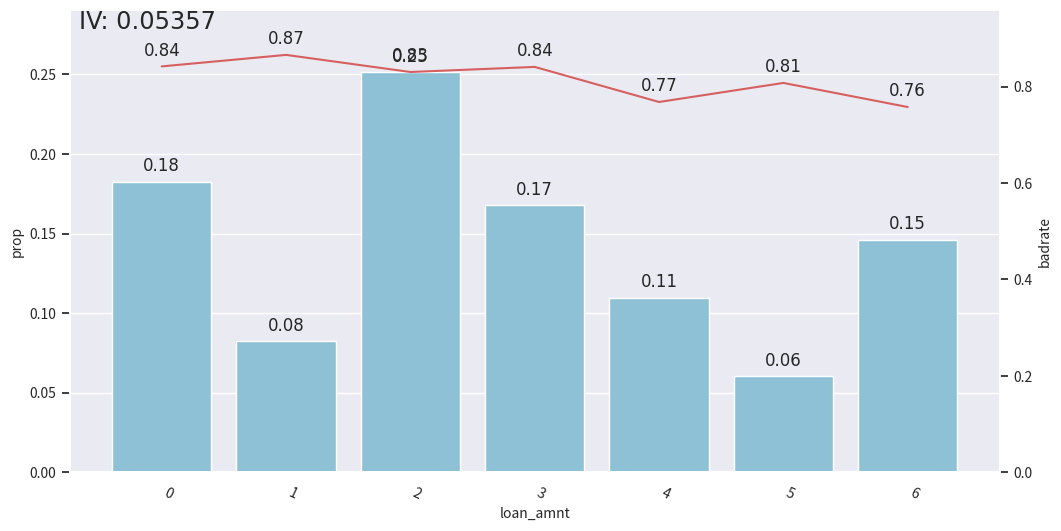

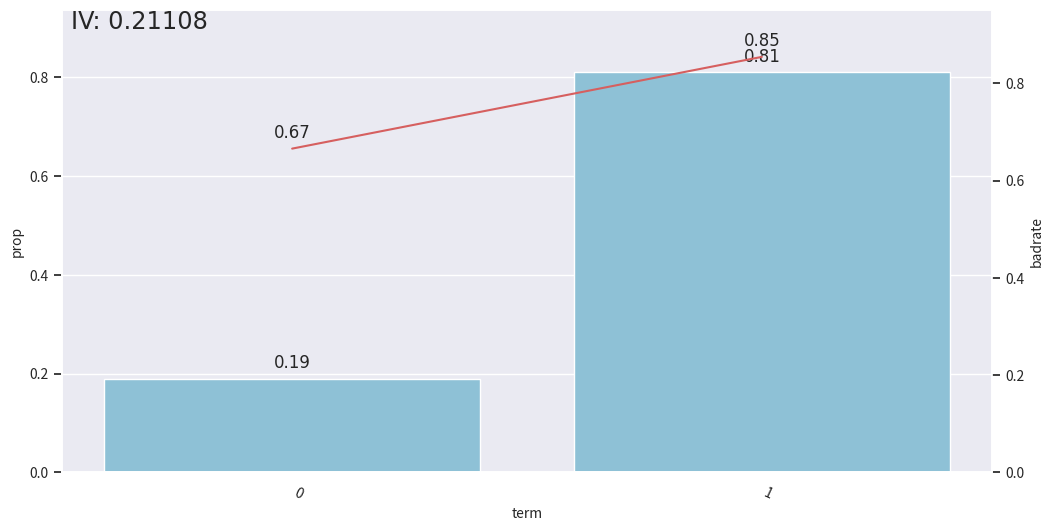

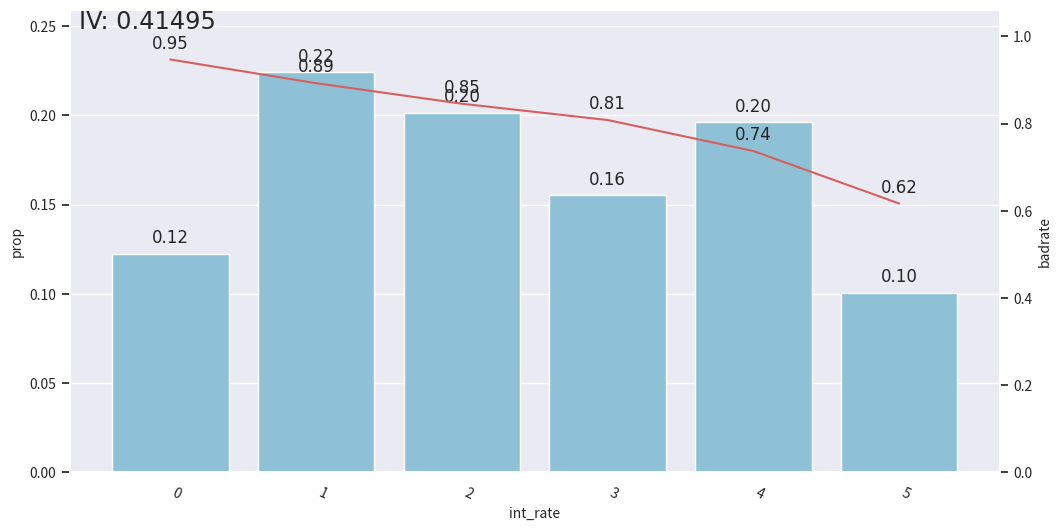

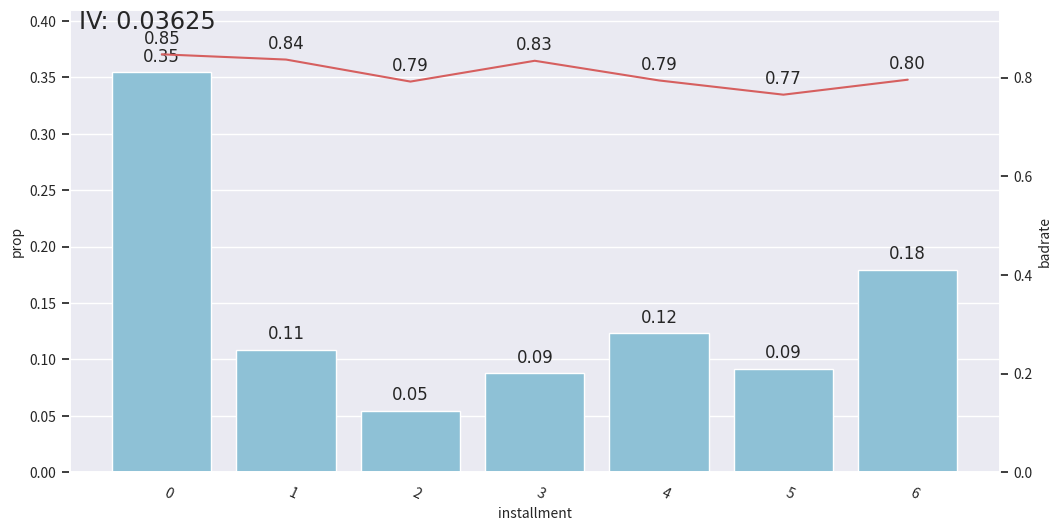

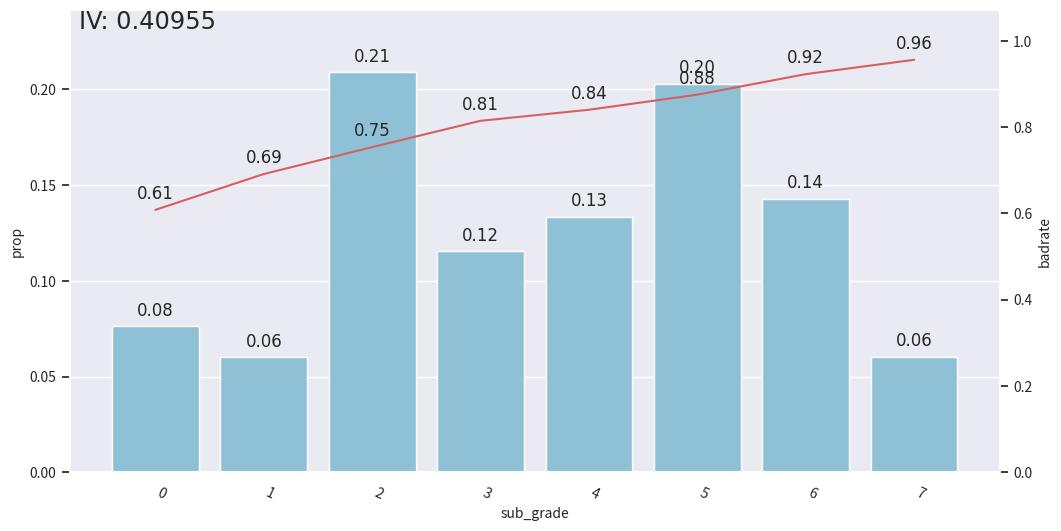

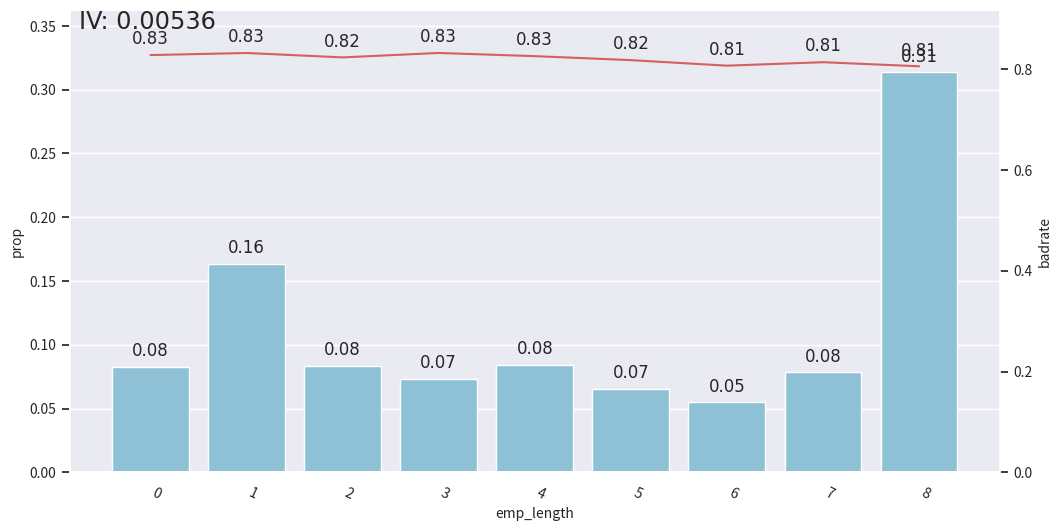

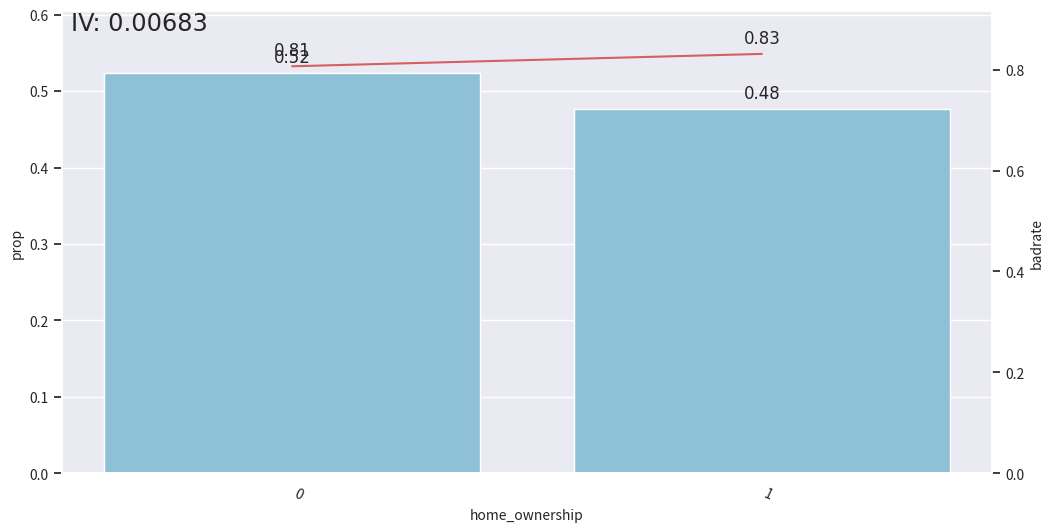

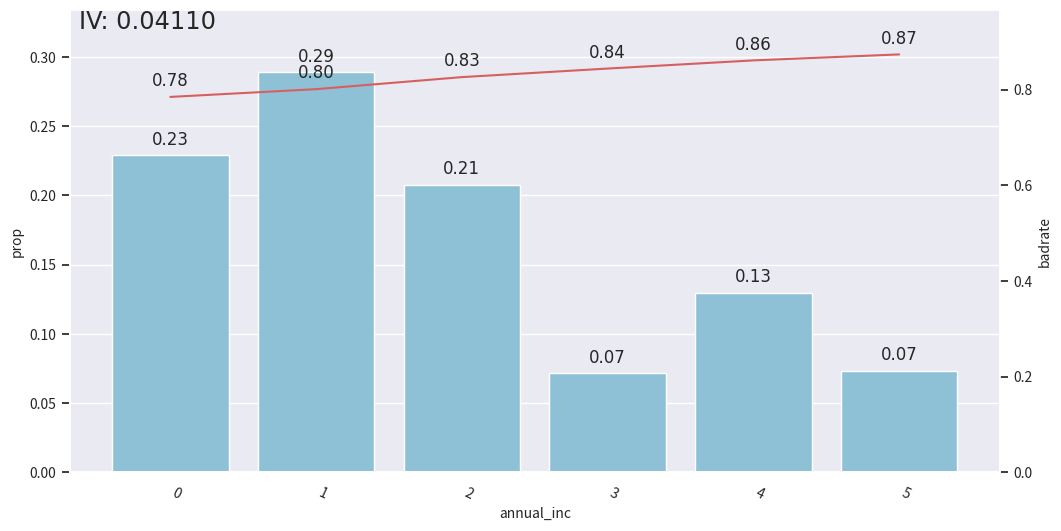

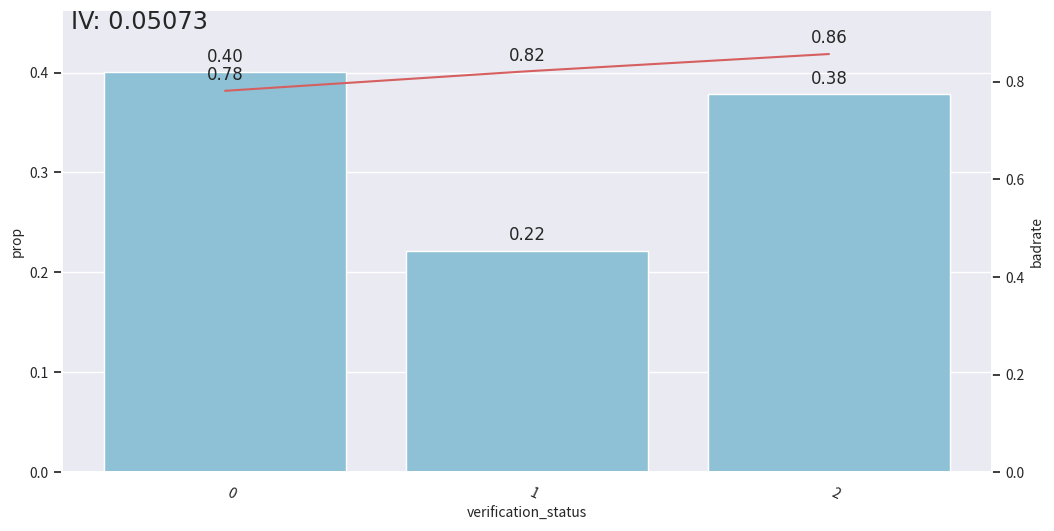

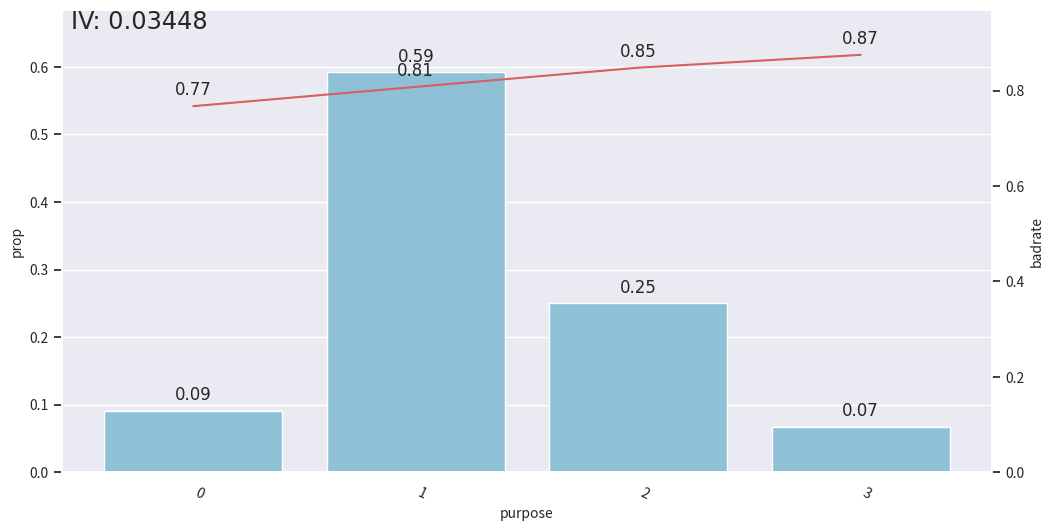

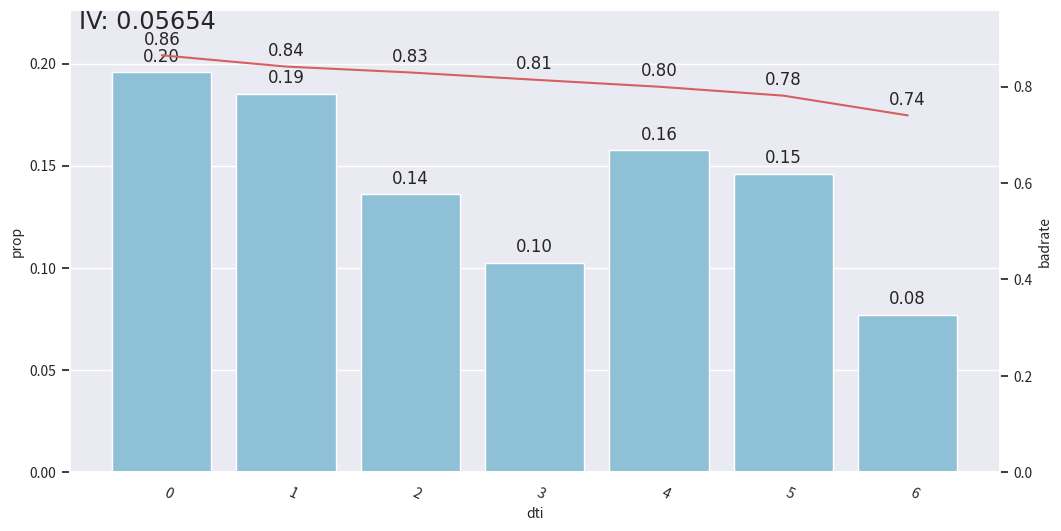

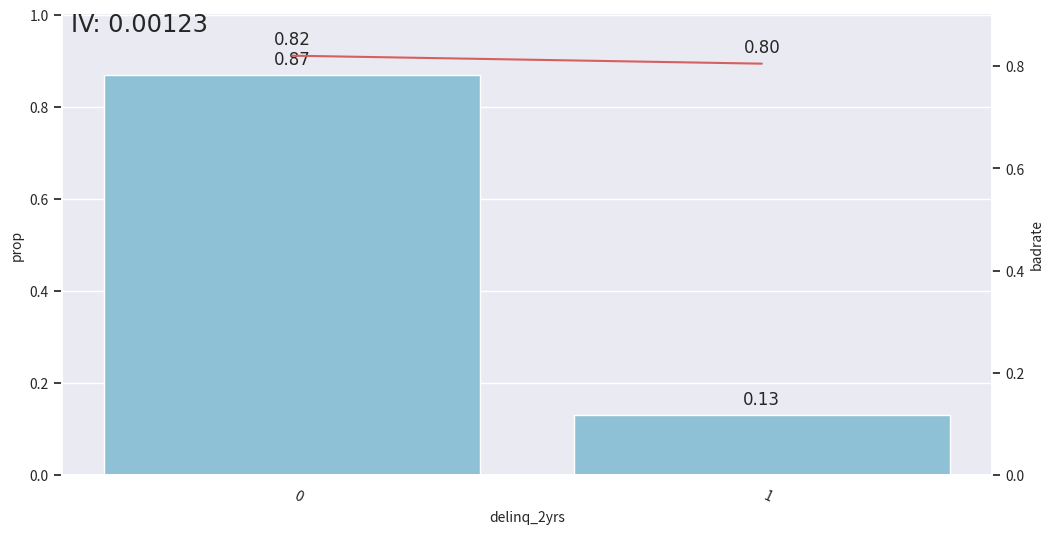

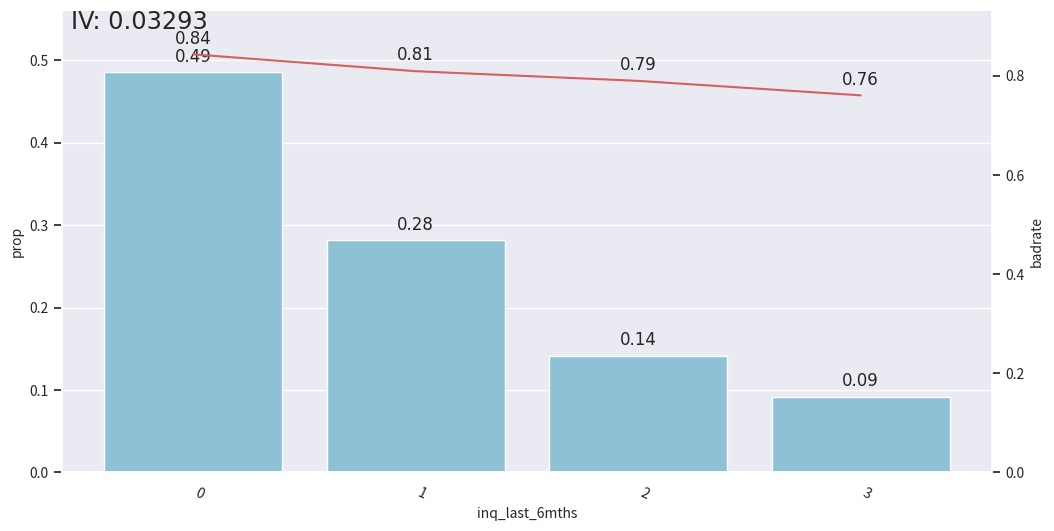

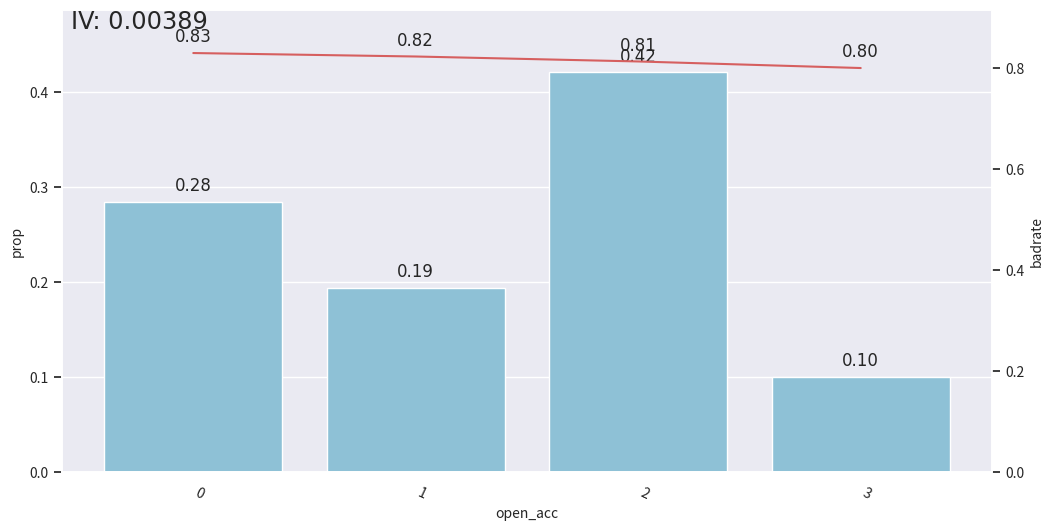

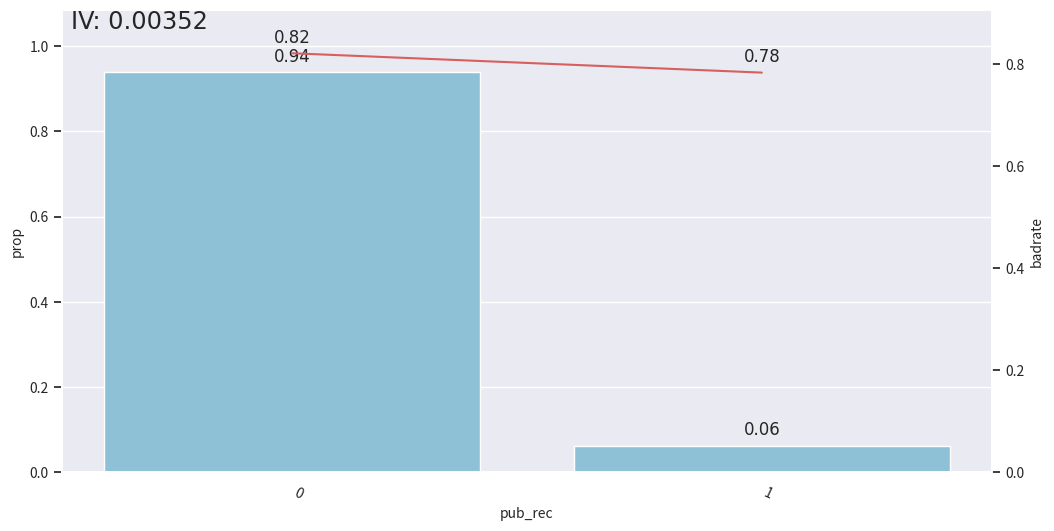

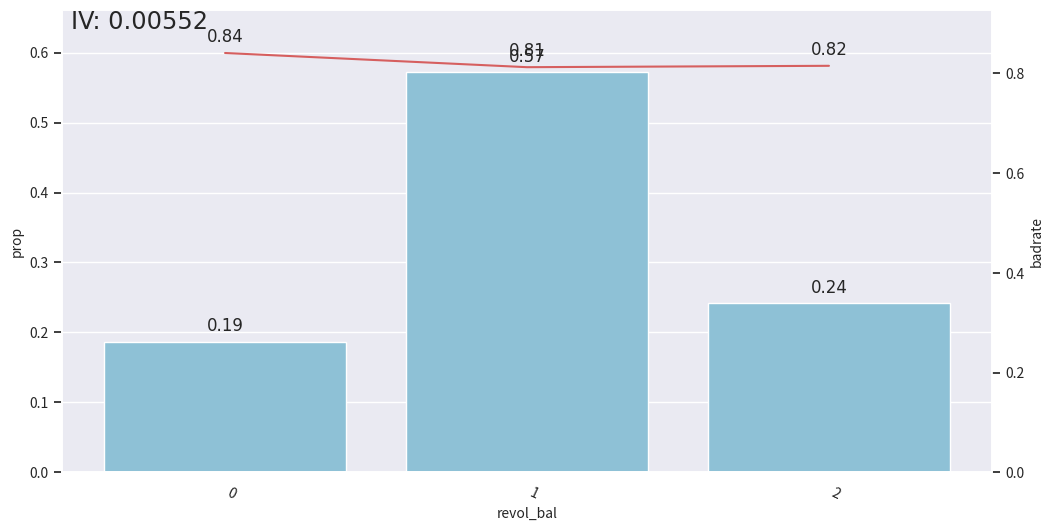

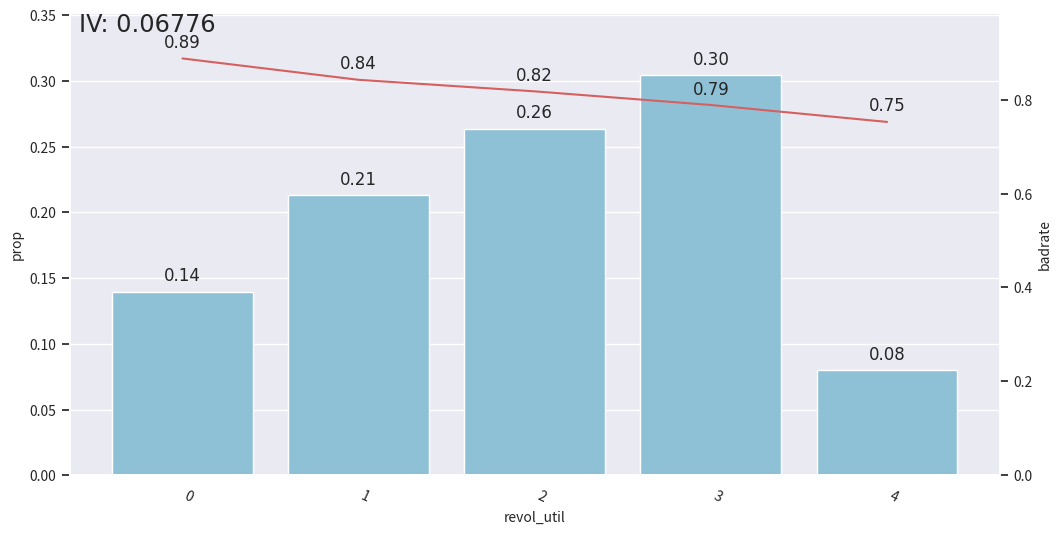

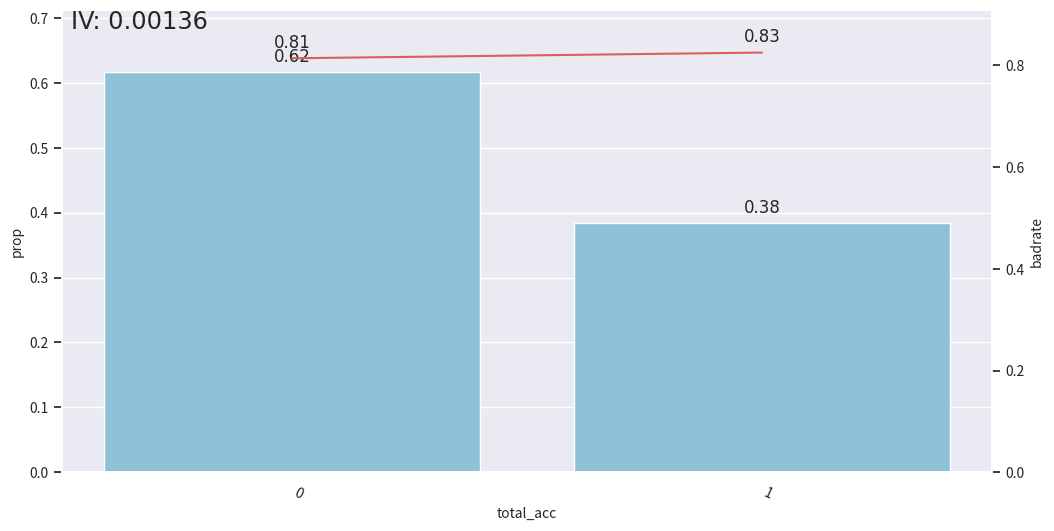

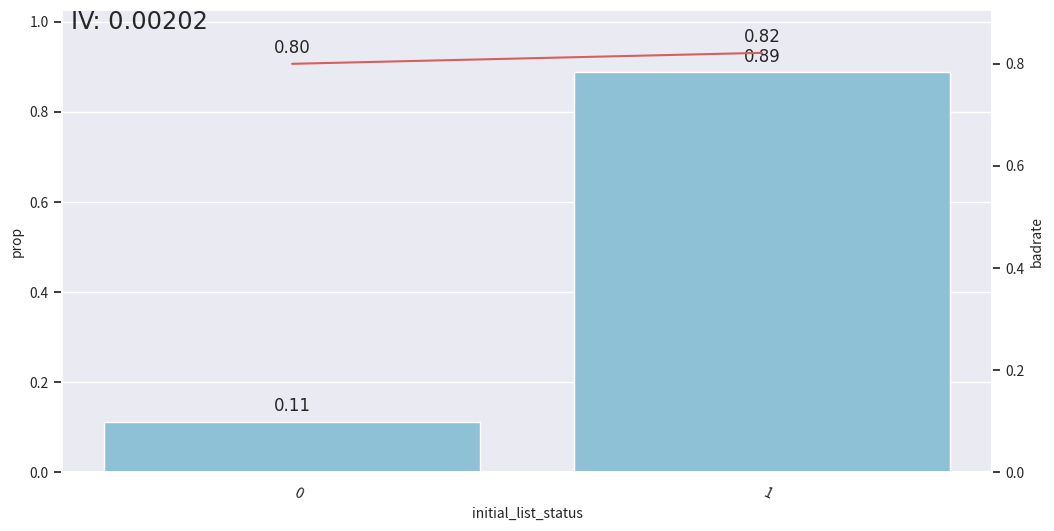

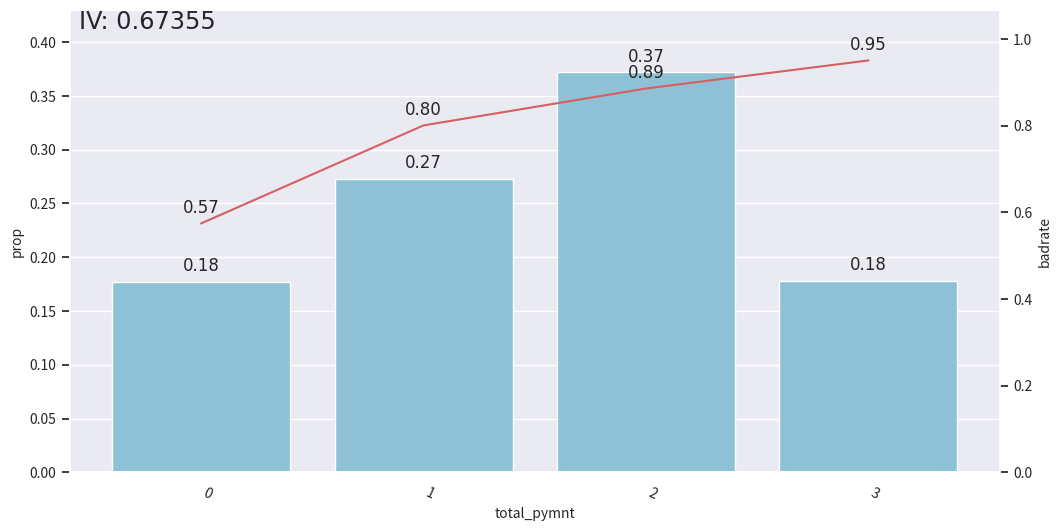

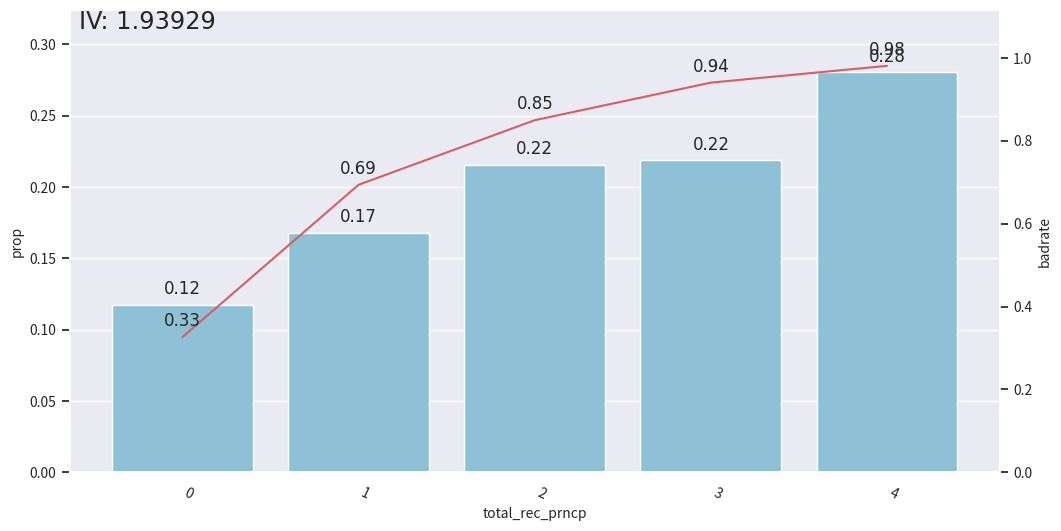

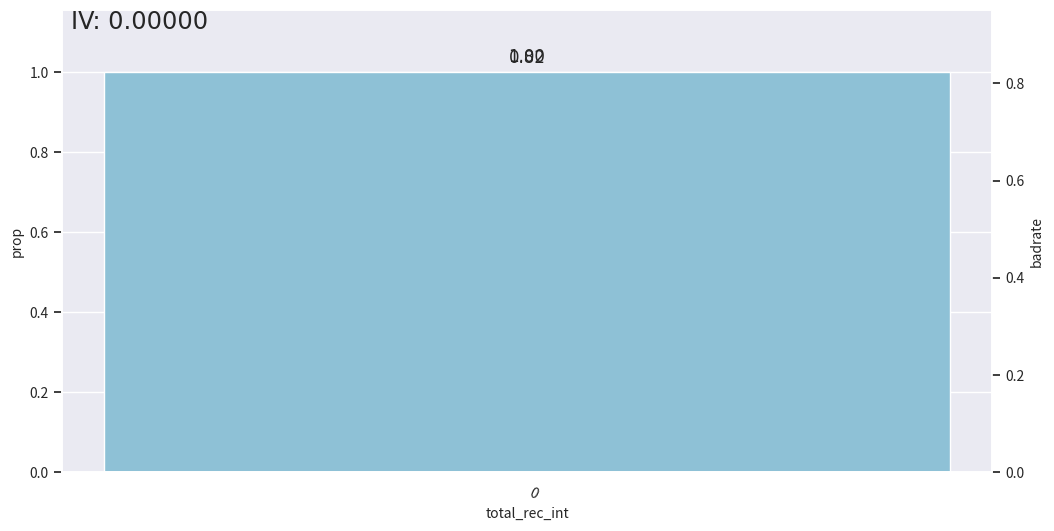

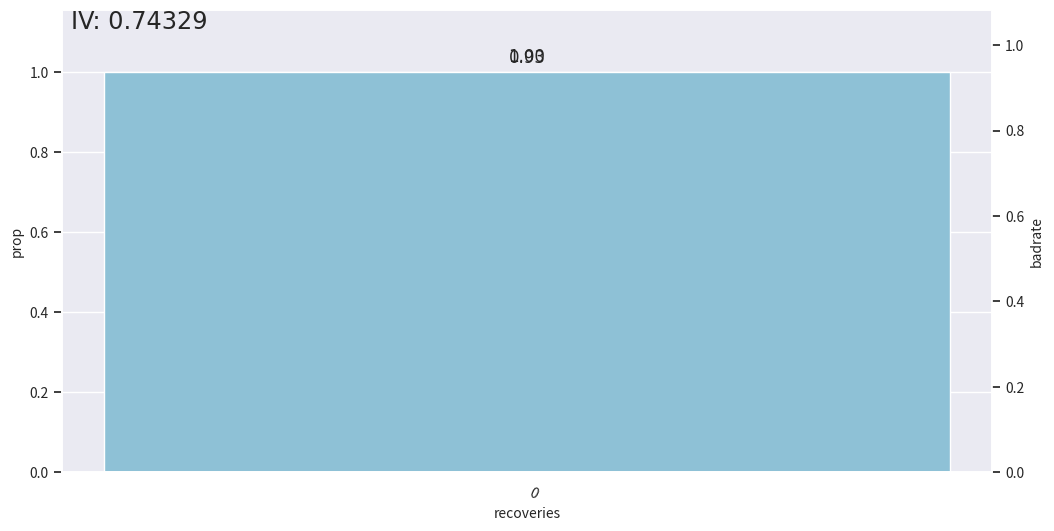

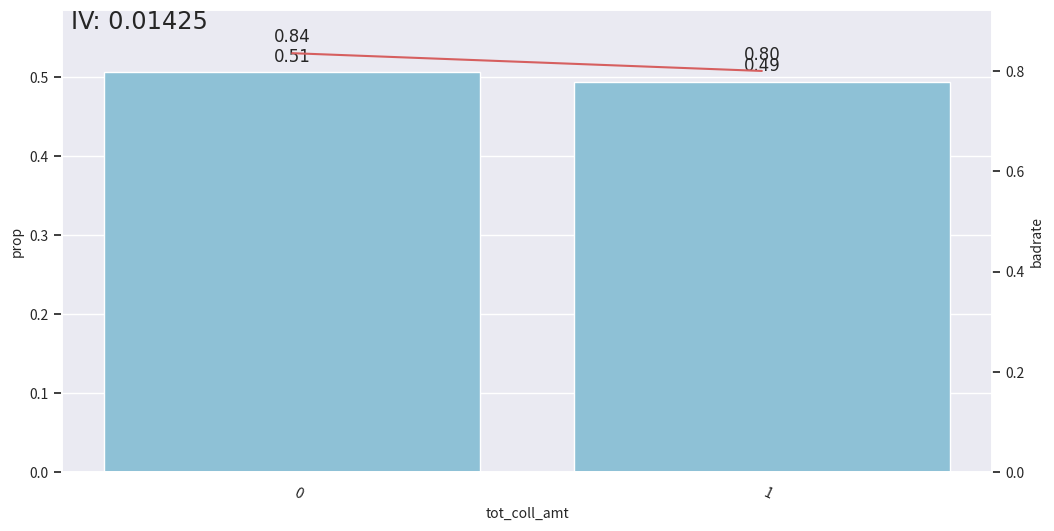

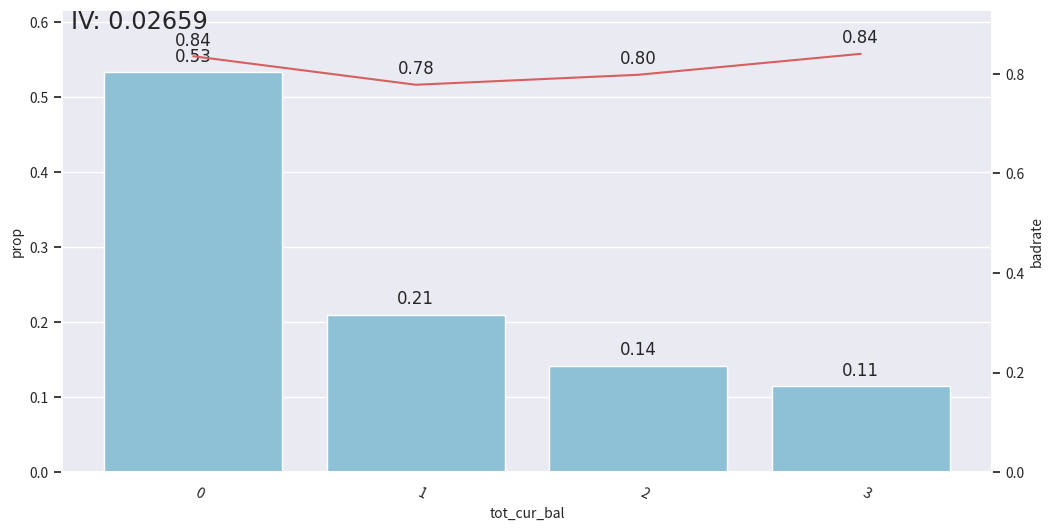

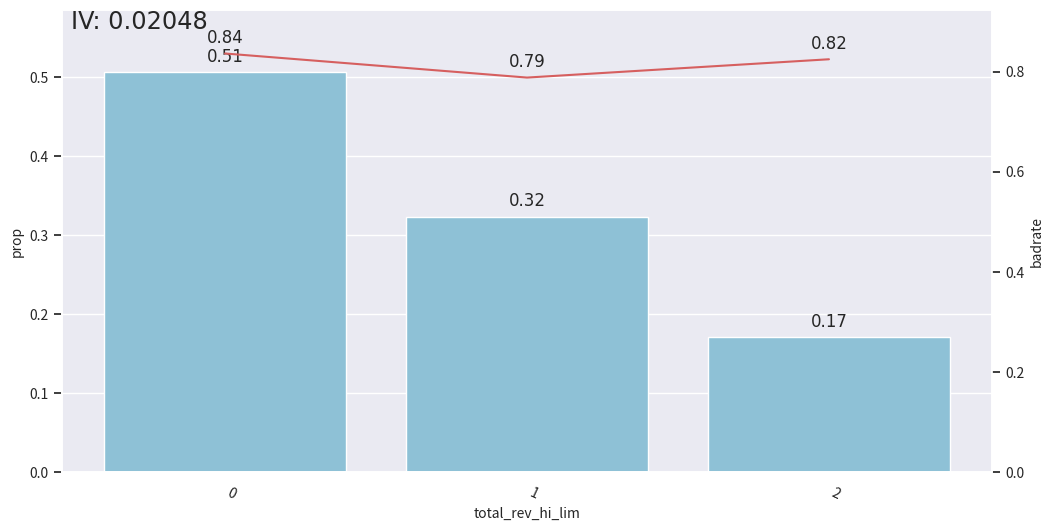

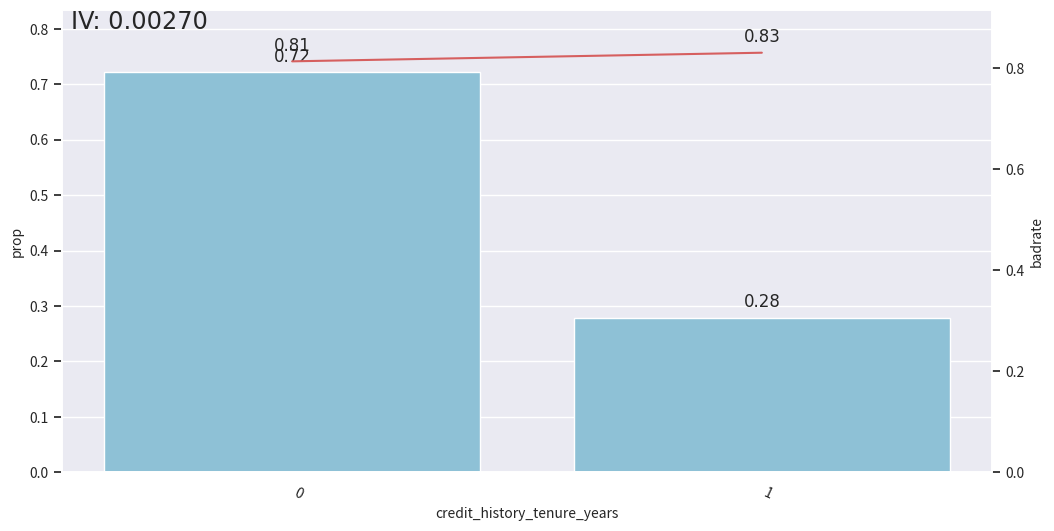

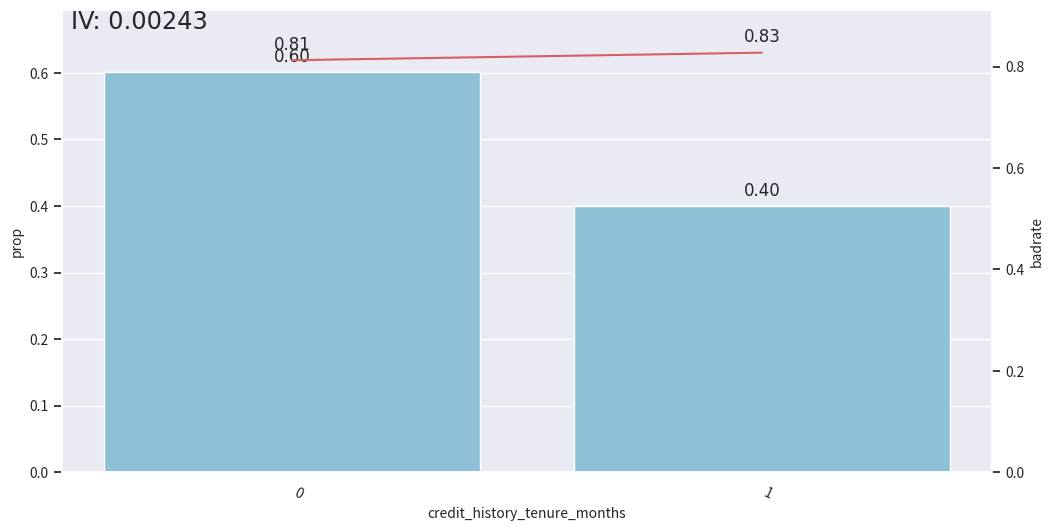

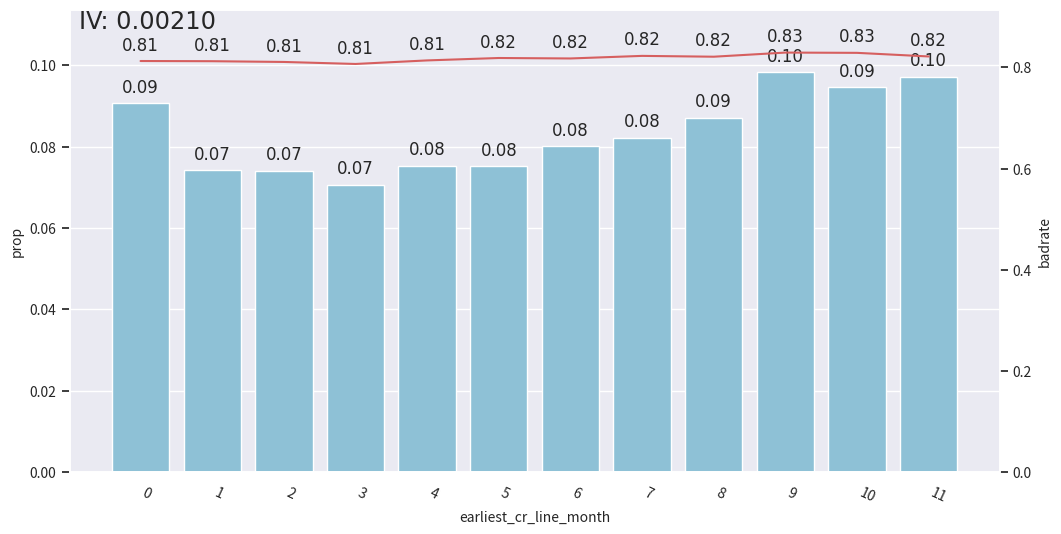

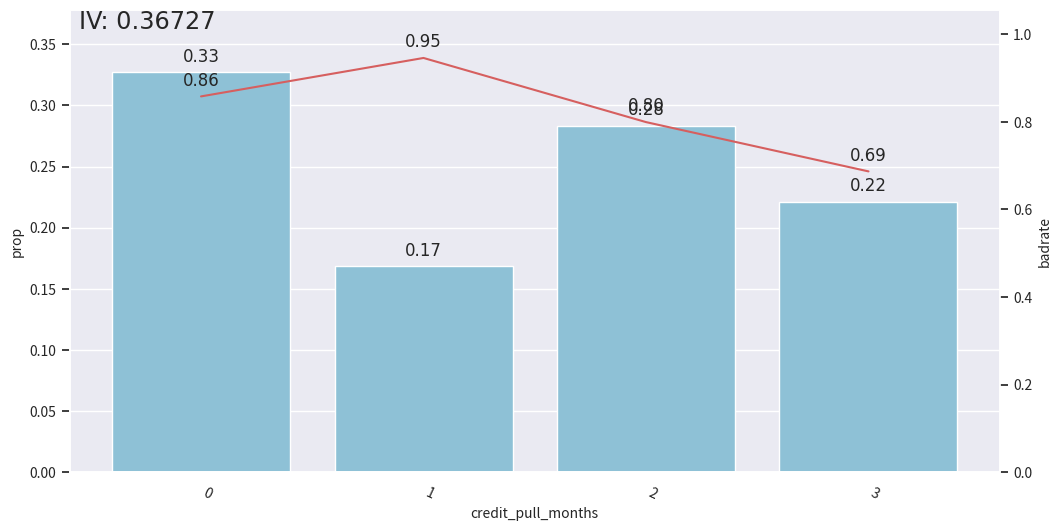

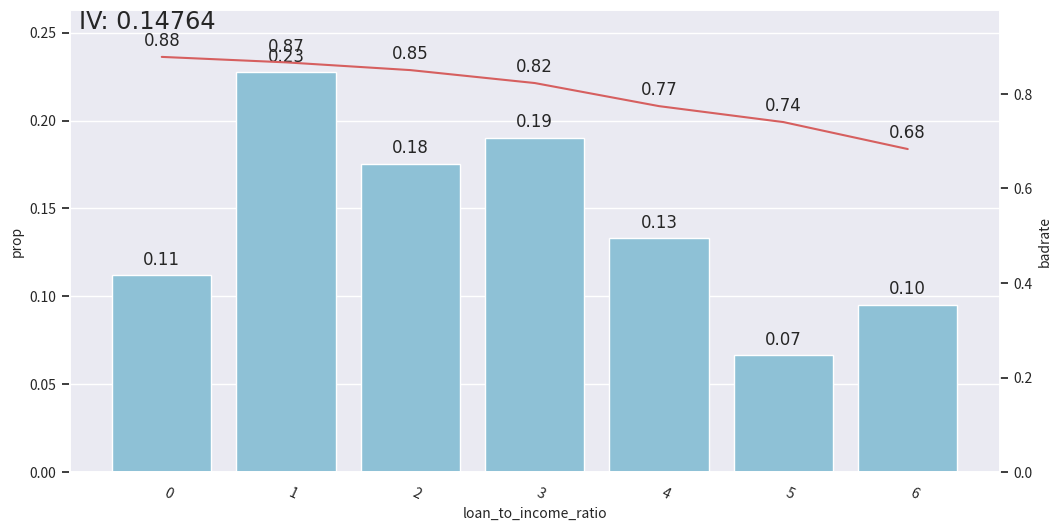

In [ ]:
from toad.plot import  bin_plot
for col in X_train.columns:
    if col != 'loan_status':
        toad.plot.bin_plot(X_train, x=col, target=y_train)

In [ ]:
quality.reset_index(inplace=True)
quality.rename(columns={'index': 'Feature'}, inplace=True)

In [ ]:
quality

,Feature,iv,gini,entropy,unique
0,recoveries,8.151625,0.111582,0.218591,2.0
1,total_rec_prncp,1.939288,0.213388,0.345273,5.0
2,total_pymnt,0.673546,0.266273,0.425055,4.0
3,int_rate,0.414945,0.279477,0.444195,6.0
4,sub_grade,0.409553,0.279868,0.444686,8.0
5,credit_pull_months,0.367274,0.282772,0.448347,4.0
6,term,0.211079,0.286182,0.457324,2.0
7,loan_to_income_ratio,0.147644,0.290104,0.462533,7.0
8,revol_util,0.067759,0.294320,0.468782,5.0
9,dti,0.056540,0.294602,0.469479,7.0


### 4.VIF

方差膨胀因子（Variance Inflation Factor，VIF）是一种统计量，用于检测回归模型中预测变量之间的多重共线性。多重共线性发生在两个或多个预测变量高度相关时，意味着它们提供了关于响应变量的冗余信息。

VIF值越高，存在多重共线性的可能性越大，需要进行更多调查。当VIF大于10时，这表明存在需要纠正的显著多重共线性。

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):

    if 'const' not in X.columns:
        X_with_const = add_constant(X)
    else:
        X_with_const = X.copy()  # Create a copy to avoid modifying the original DataFrame

    vif_values = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    return pd.DataFrame({'Feature': X_with_const.columns, 'VIF': vif_values})

# Assuming X_train is your DataFrame containing predictor variables
vif_df = calculate_vif(train_woe)
vif_df

,Feature,VIF
0,const,1.768792
1,loan_amnt,2.664622
2,term,1.599268
3,int_rate,9.747254
4,installment,2.682098
5,sub_grade,9.788745
6,emp_length,1.103870
7,home_ownership,1.289353
8,annual_inc,2.688552
9,verification_status,1.301591


In [ ]:
combined=pd.merge(quality, vif_df, on='Feature')
combined.sort_values(by='iv', ascending=True)

,Feature,iv,gini,entropy,unique,VIF
30,total_rec_int,0.000000,0.297136,0.473685,1.0,NaN
29,delinq_2yrs,0.001226,0.297081,0.473593,2.0,1.072434
28,total_acc,0.001360,0.297077,0.473584,2.0,1.511060
27,initial_list_status,0.002018,0.297044,0.473533,2.0,1.152864
26,earliest_cr_line_month,0.002103,0.297070,0.473631,12.0,1.005223
25,credit_history_tenure_months,0.002432,0.297030,0.473505,2.0,2.508986
24,credit_history_tenure_years,0.002698,0.297019,0.473486,2.0,2.399624
23,pub_rec,0.003522,0.296970,0.473418,2.0,1.042798
22,open_acc,0.003886,0.296964,0.473396,4.0,1.631634
21,emp_length,0.005360,0.296900,0.473287,9.0,1.103870


## Feature Selection based on IV and VIF

In [ ]:
filtered_columns = combined[(combined['VIF'] > 10) | (combined['iv'] < 0.02) | (combined['iv'] > 0.5)]
filtered_columns['Feature'].tolist()
columns_to_drop = filtered_columns['Feature'].tolist()

In [ ]:
columns_to_drop

['recoveries',
 'total_rec_prncp',
 'total_pymnt',
 'tot_coll_amt',
 'home_ownership',
 'revol_bal',
 'emp_length',
 'open_acc',
 'pub_rec',
 'credit_history_tenure_years',
 'credit_history_tenure_months',
 'earliest_cr_line_month',
 'initial_list_status',
 'total_acc',
 'delinq_2yrs',
 'total_rec_int']

In [ ]:
X_train.drop(columns=columns_to_drop,inplace=True)
X_test.drop(columns=columns_to_drop,inplace=True)

In [ ]:
X_train

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,verification_status,purpose,dti,inq_last_6mths,revol_util,tot_cur_bal,total_rev_hi_lim,credit_pull_months,loan_to_income_ratio
0,0,1,1,0,5,0,0,2,6,1,3,0,0,0,3
1,0,0,3,0,2,0,1,3,0,3,0,0,0,3,1
2,0,1,4,0,2,0,2,0,0,2,4,0,0,0,2
3,2,1,2,2,3,1,1,0,4,1,0,0,0,1,3
5,0,1,1,0,6,0,1,3,1,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230651,3,1,1,3,6,1,2,2,1,0,2,0,0,2,4
230652,5,1,4,6,2,1,1,1,3,3,2,0,0,0,5
230653,3,1,3,5,2,1,1,0,0,1,1,0,0,2,3
230654,6,1,4,6,2,5,1,0,0,1,2,0,0,2,3


## Recompute the WOE

In [ ]:
## Recompute the woe
t=toad.transform.WOETransformer()

#transform training set
train_woe = t.fit_transform(X=X_train, y=y_train)

#transform testing set
test_woe = t.transform(X_test[X_train.columns])

## Recompute the IV and VIF

In [ ]:
quality=toad.quality(train_woe, target=y_train, iv_only=False)

quality.reset_index(inplace=True)
quality.rename(columns={'index': 'Feature'}, inplace=True)


# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):
    # Check if the DataFrame already contains a constant column
    if 'const' not in X.columns:
        X_with_const = add_constant(X)
    else:
        X_with_const = X.copy()

    vif_values = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    return pd.DataFrame({'Feature': X_with_const.columns, 'VIF': vif_values})


vif_df = calculate_vif(train_woe)

combined=pd.merge(quality, vif_df, on='Feature')
combined.sort_values(by='iv', ascending=True)

,Feature,iv,gini,entropy,unique,VIF
14,total_rev_hi_lim,0.020475,0.296210,0.472153,3.0,1.862845
13,tot_cur_bal,0.026591,0.295923,0.471690,4.0,1.842717
12,inq_last_6mths,0.032930,0.295641,0.471220,4.0,1.128474
11,purpose,0.034480,0.295663,0.471159,4.0,1.019218
10,installment,0.036250,0.295512,0.470983,7.0,2.262125
9,annual_inc,0.041096,0.295405,0.470687,6.0,2.141369
8,verification_status,0.050733,0.294923,0.469939,3.0,1.282847
7,loan_amnt,0.053568,0.294677,0.469665,7.0,2.606735
6,dti,0.056540,0.294602,0.469479,7.0,1.198371
5,revol_util,0.067759,0.294320,0.468782,5.0,1.425044


## Compute the PSI

群体稳定性指数（Population Stability Index，PSI）通常在评分卡开发和监控过程中使用，以衡量评分分布随时间的稳定性。也就是说，它回答了这样的问题：如果基准年份是2020年，比较年份是2021年，信用评分的分布如何变化？它是改变了还是保持不变？

PSI主要用于评分卡部署后，以监控其随时间的表现。它定期（例如，每月、每季度）计算，以比较当前时期的评分分布与基准时期（通常是开发或初始验证时期）的分布。然而，计算训练数据集和验证数据集之间的PSI也很有用，以确保它们在分布上相似。这有助于检查在训练数据上构建的模型是否适用于验证数据。


- PSI < 0.1：没有显著变化。
- 0.1 ≤ PSI < 0.25：变化适中，可能需要审查。
- PSI ≥ 0.25：群体分布发生显著变化，很可能需要进行模型重新校准或重新开发。

In [ ]:
psi_df = toad.metrics.PSI(train_woe, test_woe).sort_values()
psi_df = psi_df.reset_index()
psi_df = psi_df.rename(columns = {'index': 'feature', 0: 'psi'})
psi_df

,feature,psi
0,inq_last_6mths,0.000959
1,dti,0.015669
2,annual_inc,0.017467
3,term,0.017725
4,loan_to_income_ratio,0.018242
5,revol_util,0.026031
6,installment,0.035724
7,loan_amnt,0.035796
8,verification_status,0.047121
9,purpose,0.052796


In [ ]:
#The industry level is to drop features with a PSI greater than 0.2
col_keep = list(set(list(psi_df[psi_df.psi<0.2].feature)))
train_psi = train_woe[col_keep]

print("keep:", train_psi.shape[1])

psi_df

keep: 12


,feature,psi
0,inq_last_6mths,0.000959
1,dti,0.015669
2,annual_inc,0.017467
3,term,0.017725
4,loan_to_income_ratio,0.018242
5,revol_util,0.026031
6,installment,0.035724
7,loan_amnt,0.035796
8,verification_status,0.047121
9,purpose,0.052796


In [ ]:
train_psi, drop_lst = toad.selection.select(train_psi,
                                            y_train,
                                            #empty=0.7,
                                            #iv=0.02,
                                            corr=0.7,
                                            return_drop=True,
                                            )
print("keep:", train_psi.shape[1], "drop corr:", len(drop_lst['corr']))

keep: 11 drop corr: 1


## Step wise regression

逐步回归


一旦我们得到了最终的特征，我们将使用逐步回归（前向、后向和双向）进行进一步的特征选择。这种统计技术采用T检验和F检验等方法，识别最能提升模型性能的显著特征。常见的选择标准包括AIC（赤池信息准则）、BIC（贝叶斯信息准则）和调整后的R平方。

- 前向逐步回归：从没有预测变量开始，根据它们与因变量的相关性一个一个添加变量，直到没有显著改进为止。
- 后向逐步回归：从所有预测变量开始，一个一个移除最不显著的变量，直到所有剩余变量都具有统计显著性为止。
- 双向逐步回归：结合前向选择和后向消除，迭代地添加显著变量并移除不显著变量，直到不可能进一步改进为止。

我们将继续利用toad包来实现，使用下面的代码。模型评估标准是AIC，估计方法是普通最小二乘法（OLS）。

In [ ]:
train_stp = toad.selection.stepwise(train_psi, y_train, direction='both', criterion='aic', estimator='ols', intercept=False)
print("keep:", train_stp.shape[1])

## ensure the features selected also apply to the test
test_stp = test_woe[train_stp.columns]

keep: 10


## Train Test split

In [ ]:
# Rename the dataset to X_train,y_train, X_test,y_test
X_train, y_train = train_stp, y_train
X_test, y_test = test_stp, y_test

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'max_iter': [100, 200, 300]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear'], 'max_iter': [100, 200, 300]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['saga'], 'max_iter': [100, 200, 300]}
]

# Initialize logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.6387719294050712
Test Accuracy: 0.6100664814447311


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, C=0.01, penalty='l2', solver='sag', max_iter=200)



lr.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200, random_state=42, solver='sag')

## Coefficient

In [ ]:
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
})

coefficients_df.reindex(coefficients_df['Coefficient'].sort_values(ascending=False).index)

,Feature,Coefficient
1,annual_inc,1.239467
2,int_rate,0.692031
7,purpose,0.616758
3,term,0.591030
4,inq_last_6mths,0.518916
6,dti,0.359267
8,revol_util,0.265890
0,loan_to_income_ratio,0.238177
5,loan_amnt,0.148847
9,verification_status,0.017296


## Performance

<Axes: title={'center': 'Confusion Matrix'}>

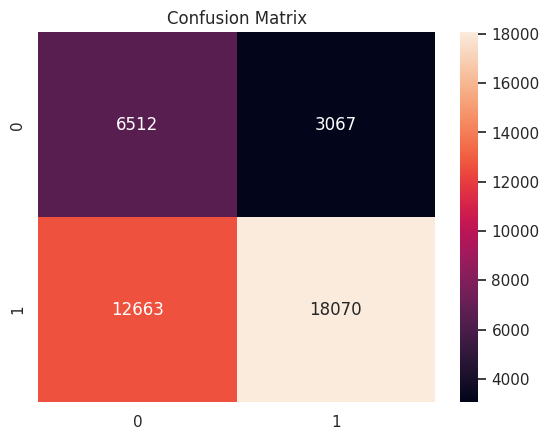

In [ ]:
predictions=lr.predict(X_test)

cm=confusion_matrix(y_test,predictions)
plt.title('Confusion Matrix')
sns.heatmap(cm,annot=True,fmt="g")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.34      0.68      0.45      9579
           1       0.85      0.59      0.70     30733

    accuracy                           0.61     40312
   macro avg       0.60      0.63      0.57     40312
weighted avg       0.73      0.61      0.64     40312



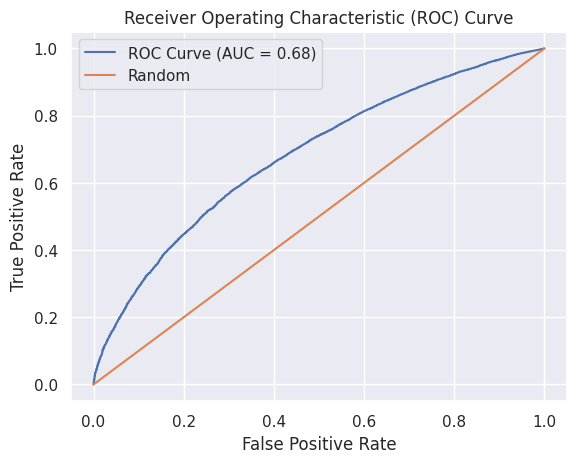

In [ ]:
y_test_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
auc=roc_auc_score(y_test,y_test_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1],label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## ScoreCard Development

评分卡开发

信用评分的目标是表明申请是好风险还是坏风险的概率。


1. 理解评分和概率

概率 - 借款人违约（未偿还贷款）与偿还贷款的可能性的比较。例如，概率为50:1，意味着每50个好客户中就有1个坏客户。

评分 - 评分是一个数字，告诉贷款人您偿还所借金额的可能性有多大。更高的分数表示较低的风险，反之亦然。

2. 评分计算的基本公式

评分 = 偏移 + 因子 × ln(概率)

3. 从公式中理解偏移

偏移 - 这是一个常量值，添加到最终评分中以确保评分落在所需的范围内，并满足特定的业务目标或行业标准。

4. 从公式中理解因子

因子 - 这是应用于逻辑回归系数的乘数，将它们转换成点数。它有助于精确度调整。更精确的评分卡能更好地分辨高风险和低风险的申请人。










Score=Offset+Factor×ln(odds)

Factor=pdo/ln(2)




理解Points to Double the Odds（pdo）

pdo是信贷风险行业中最广泛使用的缩放公式。它在评分和违约概率之间创建了一致的关系。

我们使用ln⁡(2)（2的自然对数，大约为0.693），因为它代表了使概率加倍所需的评分变化。这是pdo系统的基础。例如，它确保借款人每增加pdo点，违约概率就会加倍。

较低的pdo值（例如，pdo = 10或15）意味着需要更小的评分增量来使概率加倍。这种更细的粒度允许更精确地区分不同风险水平。较高的pdo值（例如，pdo = 20或25）意味着需要更大的评分增量来使概率加倍。这种较粗的粒度可能简化评分卡，但可能会降低模型对风险较小变化的敏感性。

例如，若pdo为20，则Factor为28.85。

假设：
* Base Score = 600
* Odds at Base Score = 50:1
* pdo = 20

则：
* Factor = 28.85


每个特征都会有一个系数，该特征中的每个分箱都有其对应的WoE（证据权重）。为了将WoE和系数整合到评分计算中，使用以下公式：

Score_i = -(beta_i * WoE_i + alpha / n) * Factor + Offset / n


* WoE_i = 每个分组特征的证据权重
* beta_i = 每个特征的回归系数
* alpha = 逻辑回归的截距
* n = 特征中的分箱数


In [ ]:
card = toad.ScoreCard(
    combiner = combiner,
    transer = t,
    class_weight = 'balanced',
    C = 0.1,
    base_score = 800,
    base_odds = 35,
    pdo = 20,
    rate = 2
)


card.fit(X_train, y_train)
final_card = card.export(to_frame=True)

In [ ]:
final_card

,name,value,score
0,loan_to_income_ratio,[-inf ~ 0.0756),67.05
1,loan_to_income_ratio,[0.0756 ~ 0.14414414414414414),67.65
2,loan_to_income_ratio,[0.14414414414414414 ~ 0.1975),68.42
3,loan_to_income_ratio,[0.1975 ~ 0.26317174588136216),69.57
4,loan_to_income_ratio,[0.26317174588136216 ~ 0.3302083333333333),71.31
5,loan_to_income_ratio,[0.3302083333333333 ~ 0.37107142857142855),72.36
6,loan_to_income_ratio,[0.37107142857142855 ~ inf),73.95
7,annual_inc,[-inf ~ 41775.0),78.20
8,annual_inc,[41775.0 ~ 60981.0),74.28
9,annual_inc,[60981.0 ~ 80256.0),67.71


## Run the scorecard on the test data

In [ ]:
test['CreditScore'] = card.predict(X_test)

In [ ]:
test.sample(10)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio,CreditScore
87335,23325,60 months,17.10,580.95,C5,8.0,RENT,52000.0,Verified,2013-09-01,0,debt_consolidation,22.55,0.0,1.0,17.0,0.0,32666,81.1,37.0,f,0.0,0.0,7109.170000,1815.87,2250.13,0.0,3043.17,30.4317,0.0,0.0,0.0,203678.0,40300.0,17.667351,212,1.0,-12,0.448558,650.592107
76057,13750,36 months,11.99,456.64,B3,3.0,MORTGAGE,50000.0,Source Verified,2013-10-01,1,credit_card,22.48,0.0,0.0,26.0,0.0,12149,55.0,47.0,w,0.0,0.0,16064.350000,13750.00,2314.35,0.0,0.00,0.0000,0.0,0.0,0.0,196232.0,22100.0,11.082820,133,9.0,-27,0.275000,650.592107
114603,16800,60 months,15.22,401.62,C3,7.0,MORTGAGE,42588.0,Verified,2013-07-01,1,credit_card,25.36,1.0,0.0,17.0,0.0,12762,58.0,40.0,w,0.0,0.0,21377.690000,16800.00,4577.69,0.0,0.00,0.0000,0.0,0.0,51.0,154241.0,22005.0,13.749487,165,10.0,-26,0.394477,650.592107
53448,12000,36 months,7.62,373.94,A3,10.0,RENT,52000.0,Source Verified,2013-12-01,1,debt_consolidation,25.47,0.0,0.0,17.0,0.0,106438,13.5,32.0,f,0.0,0.0,12674.618750,12000.00,674.62,0.0,0.00,0.0000,0.0,0.0,0.0,111354.0,150700.0,18.420260,221,7.0,-24,0.230769,650.592107
98228,10000,36 months,7.62,311.62,A3,10.0,MORTGAGE,105000.0,Verified,2013-09-01,1,debt_consolidation,17.17,0.0,0.0,11.0,0.0,5703,41.3,25.0,f,0.0,0.0,11129.160000,10000.00,1129.16,0.0,0.00,0.0000,0.0,0.0,0.0,539833.0,13800.0,12.169747,146,7.0,-26,0.095238,655.894702
107976,15000,36 months,8.90,476.30,A5,10.0,MORTGAGE,90000.0,Source Verified,2013-08-01,1,debt_consolidation,20.95,0.0,1.0,16.0,0.0,30591,59.6,33.0,f,0.0,0.0,16150.145310,15000.00,1150.15,0.0,0.00,0.0000,0.0,0.0,155.0,262379.0,51300.0,30.001369,360,8.0,-29,0.166667,653.102745
104809,6400,60 months,21.60,175.31,E3,10.0,OWN,45000.0,Verified,2013-08-01,0,other,5.87,0.0,1.0,6.0,0.0,9963,58.6,17.0,f,0.0,0.0,3856.580000,1605.00,2251.58,0.0,0.00,0.0000,0.0,0.0,0.0,214823.0,17000.0,11.496235,138,2.0,-28,0.142222,655.894702
71767,14000,36 months,14.30,480.53,C1,8.0,MORTGAGE,79000.0,Verified,2013-11-01,0,credit_card,2.72,0.0,1.0,9.0,1.0,5461,30.0,23.0,f,0.0,0.0,8166.670000,5871.29,2295.38,0.0,0.00,0.0000,0.0,0.0,0.0,5461.0,18200.0,14.672142,176,3.0,-26,0.177215,653.102745
59964,10000,36 months,10.99,327.34,B2,10.0,RENT,97000.0,Verified,2013-11-01,1,debt_consolidation,27.40,0.0,0.0,10.0,0.0,32483,82.9,27.0,f,0.0,0.0,11523.480000,10000.00,1523.48,0.0,0.00,0.0000,0.0,0.0,0.0,157739.0,39200.0,36.167009,434,9.0,-23,0.103093,655.894702
84045,6700,36 months,18.55,244.08,D2,1.0,MORTGAGE,237000.0,Verified,2013-10-01,1,other,12.99,1.0,2.0,12.0,0.0,25336,97.4,48.0,f,0.0,0.0,7288.033755,6700.00,588.03,0.0,0.00,0.0000,0.0,0.0,0.0,526764.0,26000.0,24.999316,300,10.0,-27,0.028270,657.488381
